### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

Example input: `psi(2, 3)`

Example output: `[1, 2, 4, 8]`

- HINT: use FOR loop with `for i in range(m+1):` inside the psi function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x,m):
  list = []
  for i in range(m+1):
     list.append(x**i)
  return list

In [2]:
psi(2, 3)

[1, 2, 4, 8]

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

Example input: `h(2,2,3)`

Example output: `array([ 2,  4,  8, 16])`

- HINT: use the `np.dot` between the $\alpha$ and the output of psi(x, m)

In [3]:
def h(x,𝛼,m):
   return np.dot(𝛼, psi(x,m))
    


In [4]:
ss = h(2,2,3)
 

In [5]:
s = np.array([[1,2,3,4,5,6],[1,2,3,4,5,6,],[1,2,3,4,5,6]])
s

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [6]:
s.shape

(3, 6)

#### Task 3
Create a random 3rd order polynomial and call it `p3`

- HINT: check function `np.poly1d`

In [7]:
def p3(x):
    return 3*x**3 + 2*x**2 + 7*x + 1


#### Task 4
Choose an interval `[a,b]`, on which the polynomial is S-shaped. 

At first we can choose random interval, for example `[-3,5)`, and come back to this task after **Task 7**.

In [8]:
interval = [-3,5)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-8-35c9f3fb2d53>, line 1)

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

- HINT: use `np.random.random_sample` function

Output `xs` should be numpy array with length=30 and values between `a` and `b`

In [9]:

xs = (np.random.random_sample(30) * 8) -3
xs


array([ 1.92303987,  0.02792274, -0.09470841,  3.67698502, -2.87470293,
       -2.84738064, -1.95257245,  4.50085316,  3.49866151, -2.24702391,
       -1.52091062,  1.15917173,  4.14713366,  2.12971525,  4.58921723,
        3.69938212, -2.48333664,  4.45417353, -2.70168418, -2.25157567,
        3.9771804 ,  3.88149898,  3.56069002,  4.13495251, -2.11812616,
       -2.42110616,  2.39512838,  2.21656706,  1.90690673,  1.1254386 ])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

- HINT: `ys = p3(xs)`

In [10]:
ys = p3(xs)
  

In [11]:
ys

array([ 4.31921232e+01,  1.19708382e+00,  3.52431957e-01,  2.02920259e+02,
       -7.38640052e+01, -7.19725803e+01, -2.73757056e+01,  3.46551847e+02,
        1.78449383e+02, -3.86673905e+01, -1.55744065e+01,  1.64742247e+01,
        2.78403513e+02,  5.39585464e+01,  3.65205689e+02,  2.06149415e+02,
       -4.99933542e+01,  3.36966429e+02, -6.24731624e+01, -3.88655606e+01,
        2.49208880e+02,  2.33738951e+02,  1.86714625e+02,  2.76236505e+02,
       -3.33626211e+01, -4.68000268e+01,  7.04591460e+01,  5.90134175e+01,
        4.24231499e+01,  1.56877766e+01])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

Is the curve S-shaped? if not, repeat steps 3-7.

- HINT: check out function `plt.scatter`
- HINT: polynomial `p3 = np.poly1d([1,-3, 2,-1])` is S-shaped on the interval `[-3,5]`



<function matplotlib.pyplot.show(close=None, block=None)>

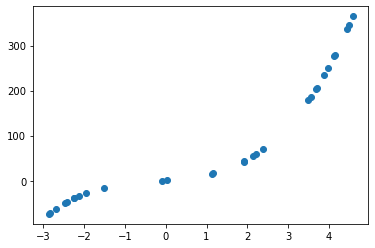

In [12]:
plt.scatter(xs, ys)
plt.show

In [13]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi(x,m) from the **Task I**, create the matrix X defined as 

<img src="matrixX.png">

- HINT: Use a for loop and call psi(x,2) on every item in `xs`. Output should be stored as columns in matrix X.
- HINT: For `m = 2` and `len(xs) = 30`, the `X.shape = (3,30)`

In [14]:
X = np.zeros([3,30])
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:

for i, v in enumerate(xs):
   result = psi(v,2)
   X[:,  i] = result
   print(X)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.92303987e+00  2.79227360e-02 -9.47084138e-02  3.67698502e+00
  -2.87470293e+00 -2.84738064e+00 -1.95257245e+00  4.50085316e+00
   3.49866151e+00 -2.24702391e+00 -1.52091062e+00  1.15917173e+00
   4.14713366e+00  2.12971525e+00  4.58921723e+00  3.69938212e+00
  -2.48333664e+00  4.45417353e+00 -2.70168418e+00 -2.25157567e+00
   3.97718040e+00  3.88149898e+00  3.56069002e+00  4.13495251e+00
  -2.11812616e+00 -2.42110616e+00  2.39512838e+00  2.21656706e+00
   1.90690673e+00  1.12543860e+00]
 [ 3.6

In [26]:
X.shape

(3, 30)

In [27]:
X

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.92303987e+00,  2.79227360e-02, -9.47084138e-02,
         3.67698502e+00, -2.87470293e+00, -2.84738064e+00,
        -1.95257245e+00,  4.50085316e+00,  3.49866151e+00,
        -2.24702391e+00, -1.52091062e+00,  1.15917173e+00,
         4.14713366e+00,  2.12971525e+00,  4.58921723e+00,
         3.69938212e+00, -2.48333664e+00,  4.45417353e+00,
        -2.70168418e+00, -2.25157567e+00,  3.97718040e+

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6 and X is matrix from the Task 8.

- HINT: Numpy functions `np.dot`, `np.linalg.inv` and `transpose()` should be used

In [28]:
XT = np.transpose(X)
XXT = np.dot(X,XT)
XXTinv = np.linalg.inv(XXT)
Xy = np.dot(X,ys)
alpha = np.dot(XXTinv,Xy)

In [29]:
alpha

array([-36.71339821,  30.14613168,  10.75290521])

#### Task 10
Plot the original data and the computed polynomial which represents our prediction into one chart. Does it fit? We need to compute prediction using alpha from the **Task 9** for the each item in xs.

HINT: for first item in xs, prediction is `y_est = h(list(xs)[1],alpha, m)` where alpha is output of the **Task 9** and **m=2**. This needs to be repeated for every element of xs

In [31]:
y_est = []
for i in range(len(xs)):
  demo = h(list(xs)[i],alpha, 2)
  y_est.append(demo)

 

<function matplotlib.pyplot.show(close=None, block=None)>

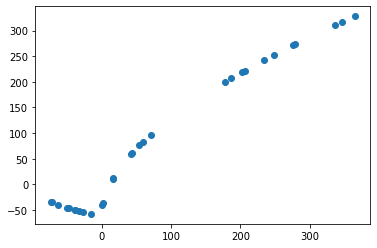

In [32]:
plt.scatter(ys, y_est)
plt.show

#### Task 11
Repeat the process, **tasks 8-10**, for m=3,…,10. What do you observe? Which polynomial has the best fit?

In [33]:

X2 = np.zeros([4,30])
X2





array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
for i, v in enumerate(xs):
   result = psi(v,3)
   X2[:,  i] = result
   print(X2)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.92303987 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [3.69808235 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [7.1115598  0.         0.         0.         0.         0.
  0.         

In [35]:
XT2 = np.transpose(X2)
XXT2 = np.dot(X2,XT2)
XXTinv2 = np.linalg.inv(XXT2)
Xy2 = np.dot(X2,ys)
alpha2 = np.dot(XXTinv2,Xy2)
alpha2

array([1., 7., 2., 3.])

30

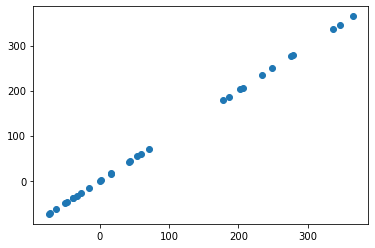

In [38]:
y_est2 = []
for i in range(len(xs)):
  demo = h(list(xs)[i],alpha2, 3)
  y_est2.append(demo)
plt.scatter(ys, y_est2)
plt.show



In [44]:
for m in range(3, 11): 
   y_est = [ ] 
   for i in range(len(xs)): 
      val = h(list(xs)[i], alpha, m) 
      y_est.append(val) 
   plt.scatter(y_est, ys) 
   plt.show() 


ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [37]:
len(y_est2)

0

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. 

y is our `ys` from the Task 6 and $\alpha^Tx$ are our predictions `y_est`. 

What do you observe? Could you tell the optimal m from the plot?

- HINT: loss can be computed as:

```
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()
```

In [37]:
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()

In [38]:
compute_loss(y_est, ys)

23305.761447470082